In [1]:
from DataLoader import Dataset
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
root = "C:/Phanh/BuAnhNet/EAAI23_test/data/"

train_class = root + "train_class.csv"
train_reg = root + "train_reg.csv"

val_class = root + "val_class.csv"
val_reg = root + "val_reg.csv"

test_class = root + "test_class.csv"
test_reg = root + "test_reg.csv"

In [3]:
train_class_df = pd.read_csv(train_class, header=None).loc[:, 1]
train_reg_df = pd.read_csv(train_reg, header=None).loc[:, 1:2]

val_class_df = pd.read_csv(val_class, header=None).loc[:, 1]
val_reg_df = pd.read_csv(val_reg, header=None).loc[:, 1:2]

test_class_df = pd.read_csv(test_class, header=None).loc[:, 1]
test_reg_df = pd.read_csv(test_reg, header=None).loc[:, 1:2]

In [4]:
print(train_class_df.value_counts())

1    107643
0     59801
2     20395
6     19797
3     11301
4      5137
5      3073
7      2973
Name: 1, dtype: int64


In [6]:
print(val_class_df.value_counts())
print(test_class_df.value_counts())

1    26772
0    15073
6     5085
2     5064
3     2789
4     1241
7      777
5      730
Name: 1, dtype: int64
0    500
3    500
4    500
5    500
2    500
6    500
1    500
7    499
Name: 1, dtype: int64


In [4]:
class_df = pd.concat([train_class_df, val_class_df, test_class_df], ignore_index=True)
reg_df = pd.concat([train_reg_df, val_reg_df, test_reg_df], ignore_index=True)

print(class_df.shape)
print(reg_df.shape)

(291650,)
(291650, 2)


In [5]:
df = pd.concat([class_df, reg_df], axis=1, ignore_index=True)
print(df.shape)
df.head(10)

(291650, 3)


,0,1,2
0,1,0.444444,-0.039683
1,1,0.783972,0.125823
2,1,0.803329,0.096787
3,1,0.537295,0.136957
4,1,0.412698,0.126984
5,6,-0.733207,0.465153
6,1,0.896825,0.158730
7,1,0.777778,0.039683
8,0,-0.012940,0.086266
9,0,0.358196,-0.189633


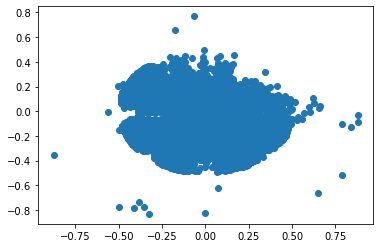

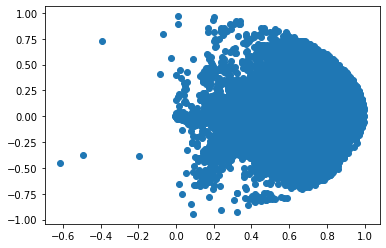

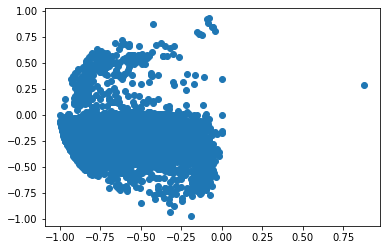

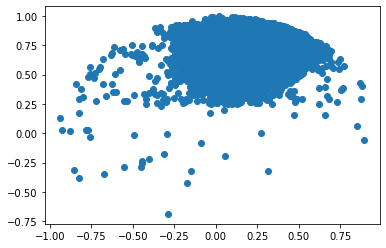

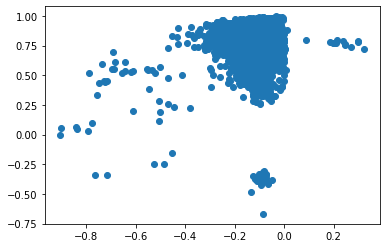

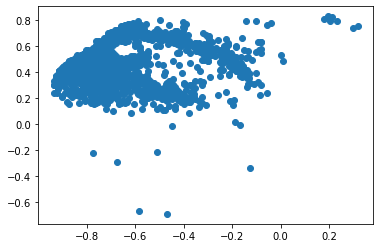

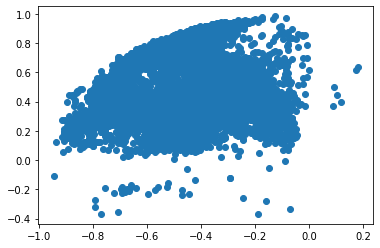

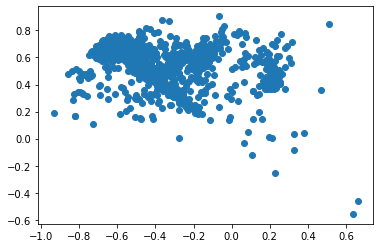

In [8]:
decoder = {
    0 : 'Neutral',
    1 : 'Happy',
    2 : 'Sad',
    3 : 'Surprise',
    4 : 'Fear',
    5 : 'Disgust',
    6 : 'Anger',
    7 : 'Contempt'
}


for i in np.unique(df.loc[:, 0]) :
    val = np.array((df.loc[df[0] == i]).loc[:, 1])
    ars = np.array((df.loc[df[0] == i]).loc[:, 2])
    plt.figure()
    plt.scatter(x=val, y=ars)


In [ ]:
print()